In [9]:
!pip install plotly
!pip install statsmodels
import requests
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")



In [37]:
#Read Data File into dataframe

DATA_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
COLUMNS = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain',
           'capital-loss', 'hours-per-week', 'native-country',
           'salary']  # From archive description, fnlwgt will be ignored
CONTINUOS_COLUMNS = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

customer_df = pd.read_csv(DATA_PATH, delimiter=",", header=None, na_values=[' ?', '?', '\t?', ' ? '], names=COLUMNS, keep_default_na=False)

#Drop fnlwgt column
customer_df = customer_df.drop("fnlwgt", axis=1)

print(customer_df.head())
print("Data Frame shape:", customer_df.shape)


   age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  salary  
0             0              40   United-State

In [38]:
# summarize the number of rows with missing values for each column
print(type(customer_df.iloc[14][12]))


for i in customer_df.columns:
 # count number of rows with missing values
 null_value = customer_df[i].isnull().sum()
 if null_value != 0:
     print(i, ":Missing:", null_value)



<class 'float'>
workclass :Missing: 1836
occupation :Missing: 1843
native-country :Missing: 583


education-num  range is: 4.5 16.5


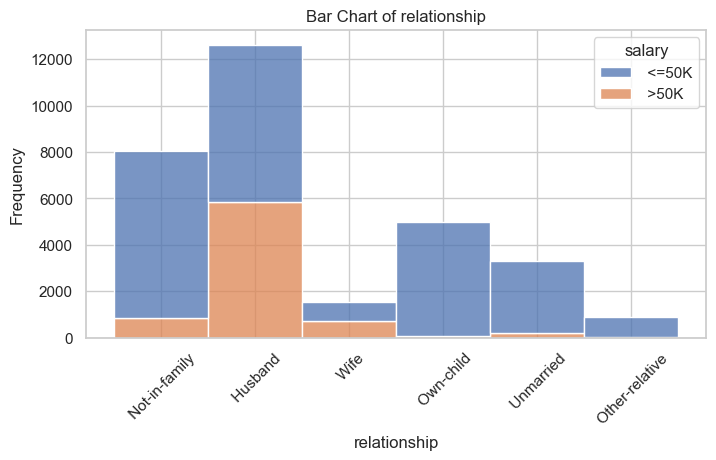

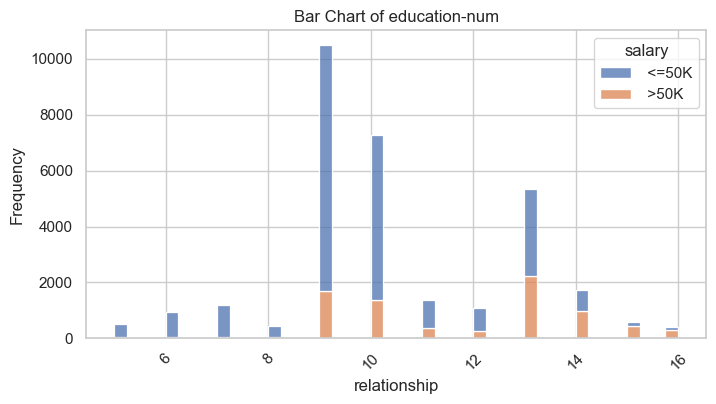

C:\Users\bistp\AppData\Local\Temp\ipykernel_11888\1863878979.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bistp\AppData\Local\Temp\ipykernel_11888\1863878979.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bistp\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [60]:
def plot_bar_chart_relation_education_num(data):
    newdata = data
    column = "relationship"
    filtercolumn = "education-num"
        
    Q1 = data[filtercolumn].quantile(0.25)
    Q3 = data[filtercolumn].quantile(0.75)
    # Compute IQR
    IQR = Q3 - Q1
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    newdata = data[(data[filtercolumn] >= lower_bound) & (data[filtercolumn] <= upper_bound)]

    print(filtercolumn, " range is:", lower_bound, upper_bound)

    #print(f"unfilter---> {column} :\n {data[column].value_counts()}")
    #print(f"FilteredData---> {column} :\n {newdata[column].value_counts()}")
    
    plt.figure(figsize=(8, 4))
    #sns.countplot(data=customer_df, x=column, palette='viridis', edgecolor='black')
    sns.histplot(newdata, x=column, hue='salary', multiple='stack')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()
    
    plt.figure(figsize=(8, 4))
    #sns.countplot(data=customer_df, x=column, palette='viridis', edgecolor='black')
    sns.histplot(newdata, x=filtercolumn, hue='salary', multiple='stack')
    plt.title(f'Bar Chart of {filtercolumn}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()
  
    def relationship(value):
        if value in [" Husband", " Wife"]:
            return "Husband+Wife"
        else:
            return "Other"
        
    def education_level(value):
        if value < 9:
            return "Basic"
        elif 9 <= value < 13:
            return "Qualified"
        elif 13 <= value:
            return "Highly Qualified"

    newdata['education-level'] = newdata['education-num'].map(education_level)
    newdata['relationship-level'] = newdata['relationship'].map(relationship)

    fig = px.parallel_categories(newdata, dimensions=['relationship-level', 'education-level', 'salary'])
    fig.show()

plot_bar_chart_relation_education_num(customer_df)



C:\Users\bistp\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

